<a href="https://colab.research.google.com/github/jmvgmr/Python/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Description: This program classifies images

In [2]:
#Load data
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#Take a look at the first image (index=0) in the training dataset
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

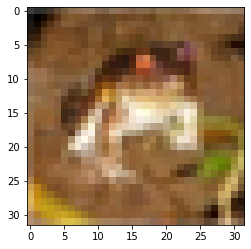

In [6]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [7]:
#Label of image
print('Label is:', y_train[0])

Label is: [6]


In [8]:
#One-Hot Encoding: Convert labels into a set of 10 numbers to nput into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new labels in training dataset
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
#Print an example of new labels
print('The oone hot label is:', y_train_one_hot[0])

The oone hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize pixels in images (0-255) to be from 0 to 1
x_train = x_train/255
x_test = x_test/255

In [11]:
#Build CNN
from keras.models import Sequential
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D

#Create architecture
model = Sequential()

#Convolution layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
#Train model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 53s 2ms/step - loss: 1.6988 - acc: 0.3843 - val_loss: 1.4812 - val_acc: 0.4660
Epoch 2/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.3589 - acc: 0.5105 - val_loss: 1.2866 - val_acc: 0.5418
Epoch 3/10
35000/35000 [==============================] - 53s 2ms/step - loss: 1.2044 - acc: 0.5720 - val_loss: 1.2289 - val_acc: 0.5659
Epoch 4/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.0984 - acc: 0.6127 - val_loss: 1.1349 - val_acc: 0.6039
Epoch 5/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.0041 - acc: 0.6467 - val_loss: 1.0814 - val_acc: 0.6264
Epoch 6/10
35000/35000 [==============================] - 52s 1ms/step - loss: 0.9395 - acc: 0.6717 - val_loss: 1.0861 - val_acc: 0.6221
Epoch 7/10
35000/35000 [==

In [14]:
#Get models accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 492us/step


0.6641

In [15]:
#Load data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('IMG_3532.jpg')

Saving IMG_3532.jpg to IMG_3532.jpg


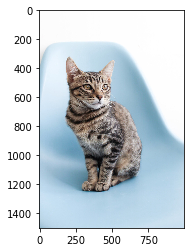

In [16]:
#Show uploaded image
img = plt.imshow(my_image)

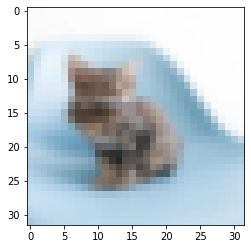

In [17]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [18]:
#Get probabilities
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

#Print probabilities
probabilities

array([[2.0063382e-02, 5.4564298e-05, 4.6265300e-02, 6.1192864e-01,
        1.4167378e-04, 1.8728041e-03, 3.0991551e-01, 3.3724107e-05,
        8.4300423e-03, 1.2943612e-03]], dtype=float32)

In [21]:
number_to_class = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argsort(probabilities[0,:])
print('Most likely class: ', number_to_class[index[9]], '--probability: ',probabilities[0, index[9]])
print('Second most likely class: ', number_to_class[index[8]], '--probability: ',probabilities[0, index[8]])
print('Third most likely class: ', number_to_class[index[7]], '--probability: ',probabilities[0, index[7]])
print('Forth most likely class: ', number_to_class[index[6]], '--probability: ',probabilities[0, index[6]])

Most likely class:  cat --probability:  0.61192864
Second most likely class:  frog --probability:  0.3099155
Third most likely class:  bird --probability:  0.0462653
Forth most likely class:  airplane --probability:  0.020063382


In [0]:
#Save model
model.save('my_model.h5')

In [0]:
#Load model
from keras.models import  load_model
model = load_model('my_model.h5')